In [1]:
from sklearn.svm import OneClassSVM
from sklearn.neighbors import LocalOutlierFactor
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
import matplotlib
from scipy import stats
import numpy as np

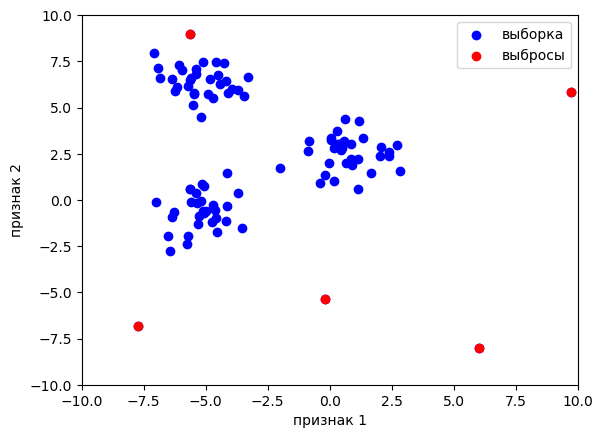

In [73]:
# Make Data
n = 100   # sample size
n_out = 5 # number of outliers
n_centers = 3

plt.style.use('default')

from sklearn.datasets import make_blobs
X = make_blobs(n_samples=n, n_features=2, centers=n_centers, center_box=(-8.0, 8.0))[0]
X[:n_out, :] = 20 * np.random.rand(n_out, 2) - 10
y = np.ones(n)
y[:n_out] = -1

plt.scatter(X[:, 0], X[:, 1], c='blue', label='выборка')
plt.scatter(X[:n_out, 0], X[:n_out, 1], c='red', label='выбросы')
plt.xlabel('признак 1')
plt.ylabel('признак 2')
plt.xlim([-10, 10])
plt.ylim([-10, 10])
plt.legend()
plt.savefig(f'features_{n_centers}.png', format='png', bbox_inches=False, pad_inches=0.05)

In [74]:
xx, yy = np.meshgrid(np.linspace(-10, 10, 500), np.linspace(-10, 10, 500))
outliers_fraction = 0.1

In [75]:
# для рисования областей
def run_and_plot(clf, X, outliers_fraction, draw_legend=True, title=''):
    clf.fit(X)
    print (clf)

    a_prob =  clf.decision_function(X)
    threshold = stats.scoreatpercentile(a_prob, 100 * outliers_fraction)

    print (f"error  = {(clf.predict(X) != y).mean()}")

    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    fig, ax = plt.subplots(figsize=(10, 10))
    plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), Z.max(), 20), cmap=plt.cm.binary) # plt.cm.Blues_r cmap=plt.cm.Blues_r)
    a_ = plt.contour(xx, yy, Z, levels=[threshold], linewidths=1, colors='yellow')
    b_ = plt.scatter(X[y > 0, 0], X[y > 0, 1], c='white')
    c_ = plt.scatter(X[y < 0, 0], X[y < 0, 1], c='red')
    plt.axis('tight')
    if draw_legend:
        plt.legend(
            [a_.collections[0], b_, c_],
            [u'разделяющая поверхность', u'нормальные объекты', u'выбросы'],
            prop=matplotlib.font_manager.FontProperties(size=15), loc='upper right')
    plt.title(title, size=25)
    formatter = matplotlib.ticker.NullFormatter()
    ax.xaxis.set_major_formatter(formatter)
    ax.yaxis.set_major_formatter(formatter)
    plt.savefig(f'{title}.png', format='png', bbox_inches=False, pad_inches=0.05)

OneClassSVM(cache_size=200, coef0=0.0, degree=3, gamma=0.02, kernel='rbf',
            max_iter=-1, nu=0.14500000000000002, shrinking=True, tol=0.001,
            verbose=False)
error  = 0.1


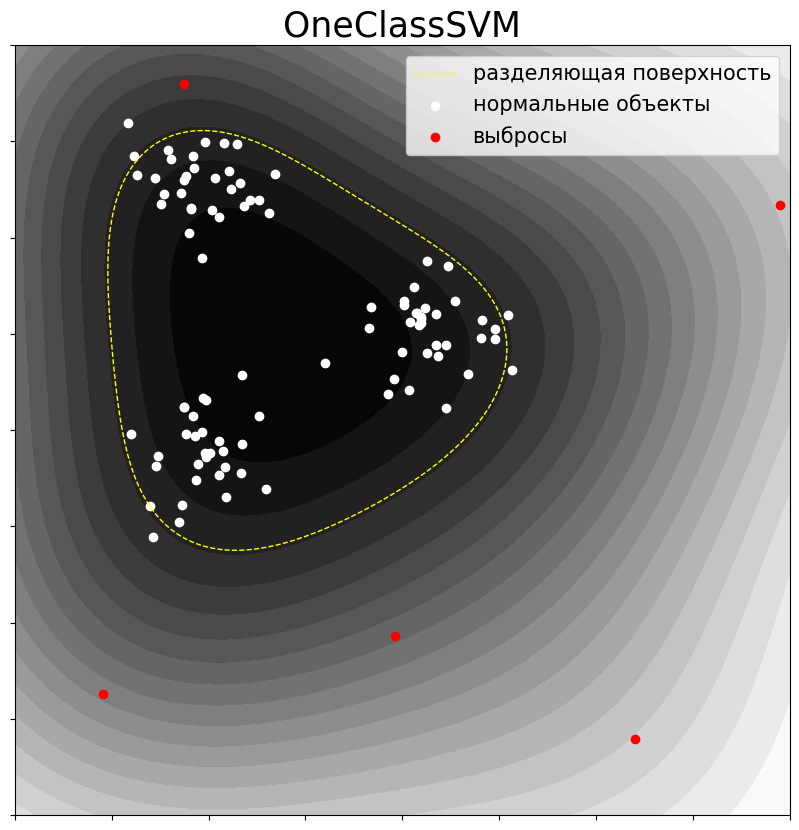

In [76]:
clf = OneClassSVM(nu=0.95 * outliers_fraction + 0.05, kernel="rbf", gamma=0.02)

run_and_plot(clf, X, outliers_fraction=outliers_fraction, draw_legend=True, title='OneClassSVM')

IsolationForest(behaviour='deprecated', bootstrap=False, contamination=0.1,
                max_features=1.0, max_samples='auto', n_estimators=50, n_jobs=1,
                random_state=None, verbose=0, warm_start=False)
error  = 0.05


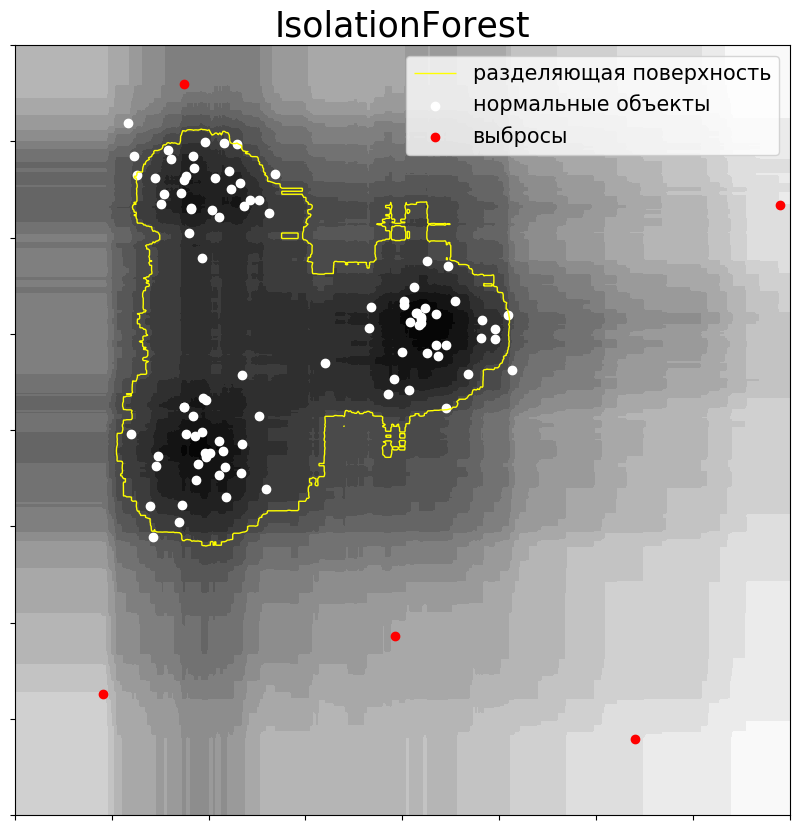

In [77]:
clf  = IsolationForest(n_estimators=50, max_samples='auto', contamination=0.1, max_features=1.0,
                       bootstrap=False, n_jobs=1, random_state=None, verbose=0)

run_and_plot(clf, X, outliers_fraction=outliers_fraction, draw_legend=True, title='IsolationForest')

EllipticEnvelope(assume_centered=False, contamination=0.05, random_state=None,
                 store_precision=True, support_fraction=None)
error  = 0.06


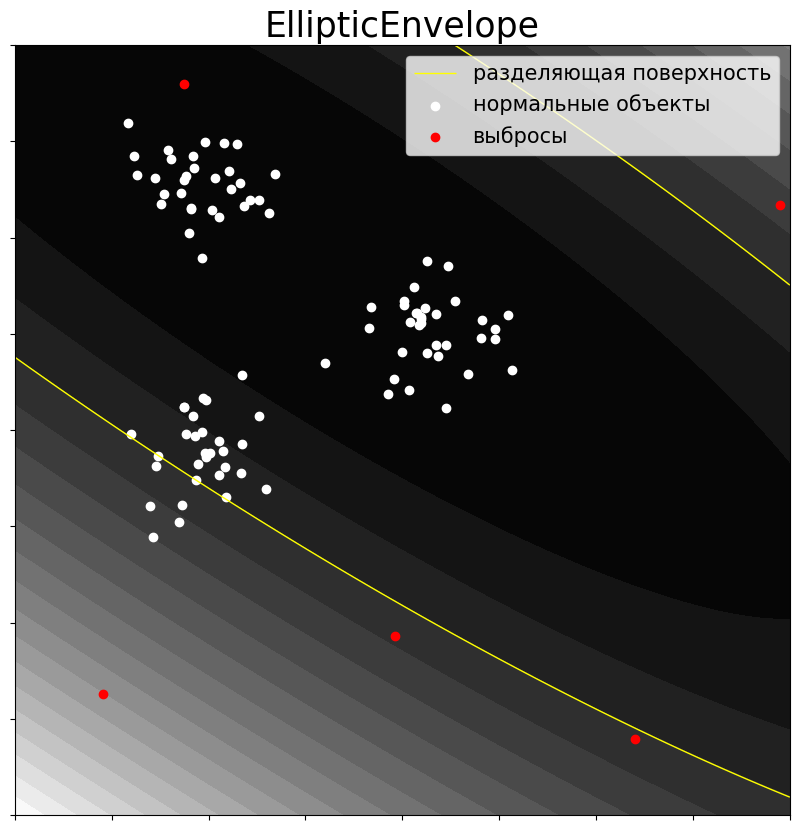

In [78]:
clf = EllipticEnvelope(store_precision=True, assume_centered=False, support_fraction=None, contamination=0.05)

run_and_plot(clf, X, outliers_fraction=outliers_fraction, draw_legend=True, title='EllipticEnvelope')

LocalOutlierFactor(algorithm='brute', contamination='auto', leaf_size=30,
                   metric='minkowski', metric_params=None, n_jobs=None,
                   n_neighbors=20, novelty=True, p=2)
error  = 0.01


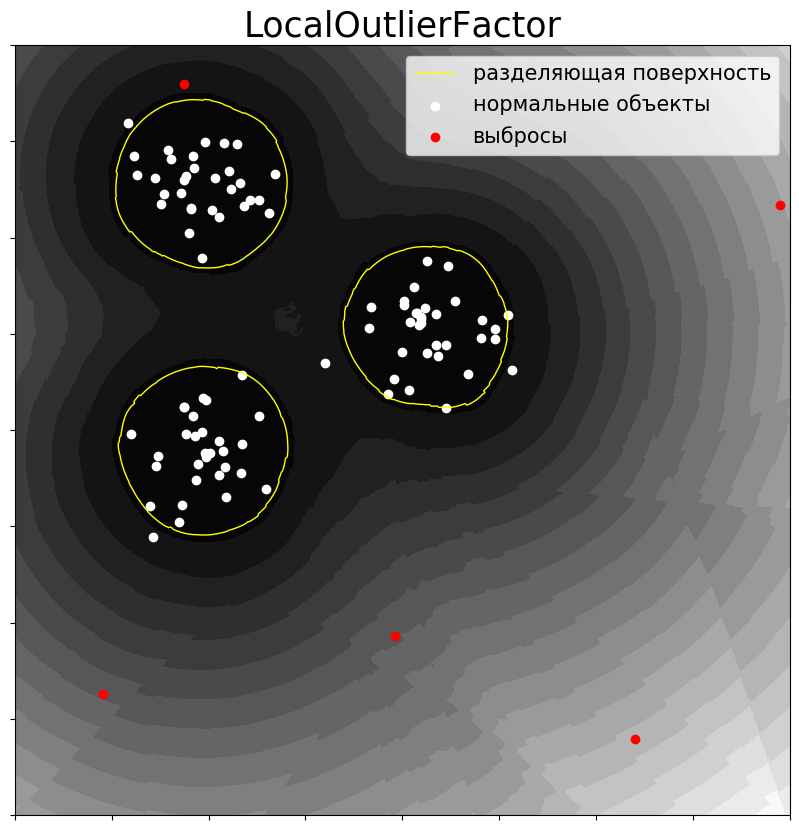

In [79]:
clf = LocalOutlierFactor(n_neighbors=20, algorithm='brute', contamination='auto', novelty=True)

run_and_plot(clf, X, outliers_fraction=outliers_fraction, draw_legend=True, title='LocalOutlierFactor')